<div class="alert alert-block alert-warning">

<h1>Mental Health</h1>
    
<a href="https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus">Kaggle Link</a>

    
<h2>About Dataset</h2>
<blockquote>The Mental Health Corpus is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not. The corpus can be used for a variety of purposes, such as sentiment analysis, toxic language detection, and mental health language analysis. The data in the corpus may be useful for researchers, mental health professionals, and others interested in understanding the language and sentiment surrounding mental health issues.
</blockquote>
</div>

<hr>

<div class="alert alert-block alert-info">
    <h2>Columns</h2>
    <p><strong>text:</strong> The comments.</p>
    <p><strong>label:</strong> 1 means considered as a comment which is poisonous with mental health issues, and 0 means not considered.</p>
</div>

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,accuracy_score,confusion_matrix

In [6]:
df = pd.read_csv('mental_health.csv')

## EDA

In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df.label.unique()

array([0, 1], dtype=int64)

In [9]:
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [10]:
df['text_len'] = df['text'].apply(len)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27977.0,0.494621,0.499980,0.0,0.0,0.0,1.0,1.0
text_len,27977.0,464.576259,699.067114,2.0,99.0,237.0,559.0,25289.0


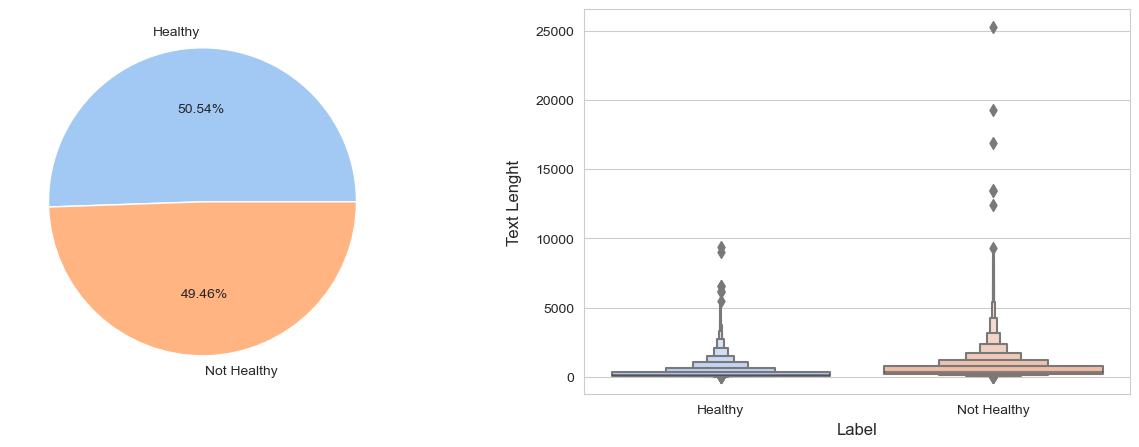

In [12]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
colors = sns.color_palette('pastel')[0:2]
plt.pie(df['label'].value_counts(),labels=['Healthy','Not Healthy'],colors = colors,autopct = '%.2f%%')

plt.subplot(1,2,2)
sns.boxenplot(x = 'label',y = 'text_len',data = df,palette='coolwarm')
plt.xticks(ticks=[0,1],labels=['Healthy','Not Healthy'])
plt.xlabel('Label',size = 12)
plt.ylabel('Text Lenght',size = 12,labelpad=10)

plt.subplots_adjust(left = 0.1,right = 0.9)
plt.show()

## Download Stopwords

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Create Stopwords and PorterStemmer

In [14]:
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

## Cleaning the Texts

In [15]:
corpus = []
for i in range(0,len(df)):
    text = re.sub('[^a-zA-Z]',' ',df['text'][i])
    text = text.lower().split(' ')
    text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
    text = ' '.join(text)
    corpus.append(text)

## Creating Bag of Words Model

In [16]:
cv = CountVectorizer(max_features=1500)

X = cv.fit_transform(corpus).toarray()
y = df['label']

## Split the Data into Train and Test Sets

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Machine Learning Models

1. Random Forest
2. Decision Tree
3. K Nearest Neighbors
4. Naive Bayes
5. Multilayer Perceptron
6. XGBoost 
7. LightGBM


### Grid Search

In [18]:
def grid_search(estimator,param_grid,modelName):
    
    gridSearch = GridSearchCV(estimator=estimator,param_grid=param_grid,cv = 5,n_jobs=-1)
    gridSearch.fit(X_train,y_train)
    
    print(modelName.center(50,'_'),end='\n\n')
    print(gridSearch.best_params_)

### Random Forest

In [19]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='entropy').fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

### Decision Tree

In [20]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
dt_params = {'max_depth':[None,3,4,5],'criterion':['entropy','gini']}
grid_search(dt_model,dt_params,'Decision Tree')

__________________Decision Tree___________________

{'criterion': 'entropy', 'max_depth': None}


In [21]:
dt_tuned_model = DecisionTreeClassifier(criterion='entropy',max_depth = None).fit(X_train,y_train)
dt_pred = dt_tuned_model.predict(X_test)

### KNN

In [22]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
knn_params = {'n_neighbors':np.arange(5,50,10)}
grid_search(knn_model,knn_params,'KNN')

_______________________KNN________________________

{'n_neighbors': 5}


In [23]:
knn_tuned_model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
knn_pred = knn_tuned_model.predict(X_test) 

### Naive Bayes

In [24]:
nb_model = GaussianNB().fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)

### MLP

In [25]:
mlp_model = MLPClassifier().fit(X_train,y_train)
mlp_pred = mlp_model.predict(X_test)

### XGB

In [26]:
xgb_model = XGBClassifier().fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)

### LGBM

In [27]:
lgbm_model = LGBMClassifier().fit(X_train,y_train)
lgbm_pred = lgbm_model.predict(X_test)

## Calculate Scores

In [28]:
def calculate_scores(y_pred,modelName):    
    global df_result,index
    
    accuracy = round(accuracy_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

    scores = {
        'model':modelName,
        'accuracy': accuracy,
        'precision': precision,
        'recall':recall,
        'tp':tp,
        'tn':tn,
        'fp':fp,
        'fn':fn
    }
    
    new_df = pd.DataFrame(data = scores,index = [index])
    df_result = pd.concat([df_result,new_df])
    index += 1  

In [29]:
predictions = {
    'Random Forest':rf_pred,
    'Decision Tree':dt_pred,
    'KNN':knn_pred,
    'Naive Bayes':nb_pred,
    'MLP':mlp_pred,
    'XGB':xgb_pred,
    'LGBM':lgbm_pred
}

df_result = pd.DataFrame()
index = 1

for p in predictions:
    calculate_scores(predictions[p],p)

df_result = df_result.sort_values(by = 'accuracy',ascending=False)
df_result = df_result.reset_index().drop('index',axis = 1)
df_result

,model,accuracy,precision,recall,tp,tn,fp,fn
0,LGBM,0.91,0.92,0.89,3639,3984,327,444
1,MLP,0.90,0.90,0.89,3628,3927,384,455
2,XGB,0.90,0.92,0.88,3576,4000,311,507
3,Random Forest,0.88,0.87,0.89,3654,3758,553,429
4,Decision Tree,0.82,0.82,0.83,3376,3549,762,707
5,Naive Bayes,0.81,0.89,0.70,2842,3950,361,1241
6,KNN,0.79,0.88,0.65,2642,3965,346,1441


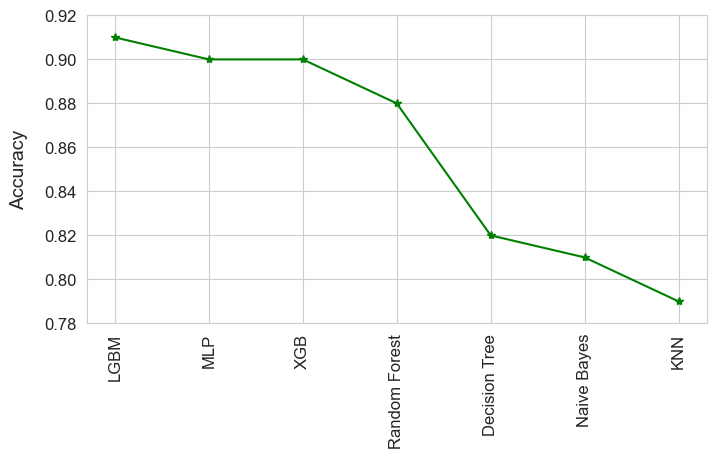

In [30]:
plt.figure(figsize = (8,4))
plt.plot(df_result['accuracy'],'g-*')
plt.xticks(ticks=np.arange(0,7),labels=df_result['model'],size = 12,rotation = 'vertical')
plt.yticks(np.arange(0.78,0.93,0.02),size = 12)
plt.ylabel('Accuracy',size = 14,labelpad=12)
plt.show()